In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

# Загрузка обучающей и тестовой выборки

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

In [4]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

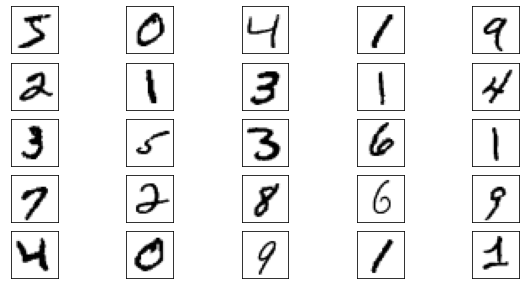

In [8]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

In [9]:
plt.show()

In [10]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [11]:
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


### Компиляция НС с оптимизацией по Adam и критерием - категориальная кросс-энтропия

In [13]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### Запуск процесса обучения: 80 % - обучающая выборка, 20 % - выборка валидации

In [14]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2853 - accuracy: 0.9193 - val_loss: 0.1529 - val_accuracy: 0.9587
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1323 - accuracy: 0.9612 - val_loss: 0.1214 - val_accuracy: 0.9652
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0902 - accuracy: 0.9734 - val_loss: 0.1100 - val_accuracy: 0.9674
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0671 - accuracy: 0.9801 - val_loss: 0.0910 - val_accuracy: 0.9732
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0533 - accuracy: 0.9841 - val_loss: 0.0898 - val_accuracy: 0.9731


### Оценка модели на тестовой выборке

In [15]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0859 - accuracy: 0.9747


[0.08589783310890198, 0.9746999740600586]

### Проверка распознавания цифр

[[2.3852097e-08 5.7406593e-05 9.9994075e-01 1.1856347e-06 1.7865023e-14
  2.5625749e-07 3.2886437e-08 6.4889012e-13 3.0734770e-07 4.5412840e-12]]
Распознанная цифра: 2


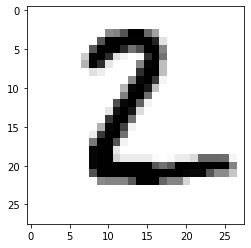

In [16]:
n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print(f"Распознанная цифра: {np.argmax(res)}")
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

### Распознавание всей тестовой выборки

In [19]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 8 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


### Выделение неверных вариантов

In [22]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(253, 28, 28)


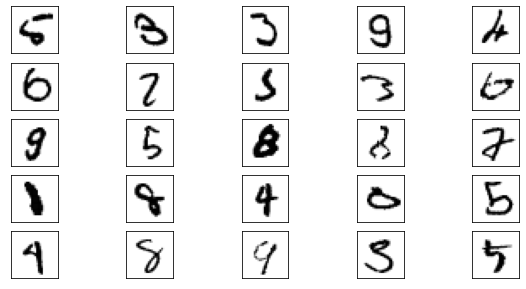

In [23]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()